# Data Description

Mid-Term Project 601

https://data.world/jobspikr/10000-data-scientist-job-postings-from-the-usa.This data set is used to analyze the jobs of Data Scientists all over the USA.

This data is extracted using JobsPikr - a job data delivery platform that extracts job data from job boards across the globe.

The dataset is from 2019(March - October), size is 48.5 MB.

There is no permission required to download and use this data.

There is not much Analysis done on this data, and I thought it would be a good pick.

The data has 10,000 rows, 22 columns.

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from urllib.parse import urlparse

In [132]:
# Reading CSV File
data = pd.read_csv('data_scientist_united_states_job_postings_jobspikr.csv')
data.shape  # rows , column

(10000, 22)

In [133]:
data.head() # DataFrame

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN


# Data inconsistencies and Shortcomings

1)  category column has 882 Nan Values.<br>
2)  Inferred City is just creating a replica for the City Column.<br>
3)  Inferred_state is just creating a replica for the State_Column.<br>
4)  Country and inferred_country have all the value are redundant.<br>
5)  contact_email has all the values as Nan.<br>
6)  job_board column has 690 Nan Values.<br>
7)  Geo column has 700 Nan Values.<br>
8)  salary_offered column has 9403 Nan Values and is a String type.<br>
9)  contact_phone_number column has 9584 Nan Values.<br>
10) html_job_description column has 8401 Nan Values.<br>
11) City column has 249 Nan Values<br>
12) state column has 416 Nan Values<br>
13) company_name column has 1 Nan Values<br>
14) crawl_timestamp column is String.<br>
15) Job_type column has value Undefined.

# Data Cleaning

1) Dropping contact_email column as it has no data.<br>
2) Dropping Country column as it has same data in all rows.<br>
3) Dropping contact_phone_number as we are not going to use it in analysis.<br>
4) Dropping country,inferred_country column as we all the columns are the USA only.<br>
5) Dropping inferred_city,inferred_state column as it is deduced based on some prior analysis on data.<br>
6) Impute value of Salary offered based on mode of it because it containded many Nan Value<br>
7) Impute value of Company because it containded 1 Nan Value.<br>
8) Dropping html_job_description as we are not going to use it in analysis.<br>
9) Dropping geo as we are not going to use it in analysis.<br>
10) Impute value of category offered because it contained Nan Values.<br>
11) Impute Value of city name because it contained Nan Values.<br>
12) Impute Value of state name because it contained Nan Values.<br>
13) Dropped Url column as we extracted Domain from the Url which we can use in our analysis

In [134]:
# Dropping above mentioned Columns
data.drop(labels = ['contact_email','country','contact_phone_number','inferred_country','inferred_city','inferred_state','html_job_description','geo'],axis = 1,inplace = True)

**extracting domain from the URL using urlparse**

In [135]:
data['job_board'] =  [urlparse(i).netloc for i in data['url']]

**dropped URL column as I extracted domain from the URL which will help me in the analysis**

In [136]:
data.drop(labels = ['url'] ,axis = 1,inplace = True)

In [137]:
# Imputing each and every column which have a value Nan
data['salary_offered'].fillna(data['salary_offered'].mode()[0],inplace = True)  # Imputing each and evry column which have a value Nan
data['company_name'].fillna(data['company_name'].mode()[0],inplace = True)
data['category'].fillna(data['category'].mode()[0],inplace = True)
data['city'].fillna(data['city'].mode()[0],inplace = True)
data['state'].fillna(data['state'].mode()[0],inplace = True)

In [138]:
#Converting crawl timestamp dtype to datetime dtype
data['crawl_timestamp'] = pd.to_datetime(data['crawl_timestamp'], format = '%Y-%m-%d %H:%M:%S +%f' ) 

# Data characterisation

1) After cleaning the data we have 13 columns and 10000 rows<br>
2) Data has got no Missing value<br>
3) Information has been extracted from Url and copied to Job_board<br>
4) crawl timestamp object Dtype has been converted to timedate Dtype<br>
5) contact_email column has been dropped<br>
6) All Nan values have been replaced by most_often occurring values<br>


In [139]:
data.info() # information about the data after cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   crawl_timestamp  10000 non-null  datetime64[ns]
 1   job_title        10000 non-null  object        
 2   category         10000 non-null  object        
 3   company_name     10000 non-null  object        
 4   city             10000 non-null  object        
 5   state            10000 non-null  object        
 6   post_date        10000 non-null  object        
 7   job_description  10000 non-null  object        
 8   job_type         10000 non-null  object        
 9   salary_offered   10000 non-null  object        
 10  job_board        10000 non-null  object        
 11  cursor           10000 non-null  int64         
 12  uniq_id          10000 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 1015.8+ KB


In [140]:
data.isnull().sum() #Checking for Nan Values

crawl_timestamp    0
job_title          0
category           0
company_name       0
city               0
state              0
post_date          0
job_description    0
job_type           0
salary_offered     0
job_board          0
cursor             0
uniq_id            0
dtype: int64

In [141]:
data.shape  # Shape of Data

(10000, 13)

# Data Aanalysis

In [142]:
data['Counter'] = [1 for i in range(0,len(data['category']))]              # creating new Column Counter 

In [143]:
datascience_categories = data.groupby(['category']).sum()                   #creating a df
datascience_categories.reset_index(inplace = True)

**Droping the extra cursor column**

In [144]:
datascience_categories.drop(labels = 'cursor', axis =1 , inplace = True)

**The maximum category of data science jobs, listed is**

In [145]:
datascience_categories.iloc[datascience_categories.index[datascience_categories['Counter'] == max(datascience_categories['Counter'])].tolist()[0:4]]


,category,Counter
32,Computer-or-internet,2387


In [146]:
counter_size = 5
Counter = sorted(datascience_categories['Counter'], reverse = True)[0:counter_size] #sorting to get Top Values
category = []
for i in range(0,len(Counter)):                                                # looping to get category with respect to Counter
    category.append(datascience_categories.loc[datascience_categories['Counter'] == Counter[i] ,'category'].iloc[0])

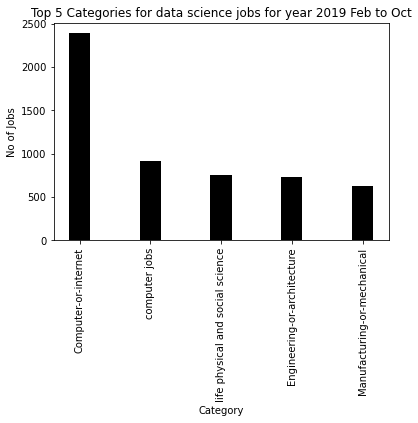

In [147]:
plt.bar(category,Counter, width = 0.3,color = 'black')                                 #plotting a bar chart
plt.xticks(rotation=90)
plt.title(f'Top {counter_size} Categories for data science jobs for year 2019 Feb to Oct')
plt.xlabel('Category')
plt.ylabel('No of Jobs')
plt.show()

In [148]:
State_by_jobs = data.groupby(['state']).sum().reset_index()                          #creating a df

In [149]:
State_by_jobs.iloc[State_by_jobs.index[State_by_jobs['Counter'] == max(State_by_jobs['Counter'])].tolist()[0:4]]

,state,cursor,Counter
23,CA,2967455687447162368,1901


In [150]:
counter_value = 5
Counter = sorted(State_by_jobs['Counter'], reverse = True)[0:counter_value]            #sorting to get Top Values
States = []
for i in range(0,len(Counter)):                                                 # looping to get States with respect to Counter
    States.append(State_by_jobs.loc[State_by_jobs['Counter'] == Counter[i] ,'state'].iloc[0]) 

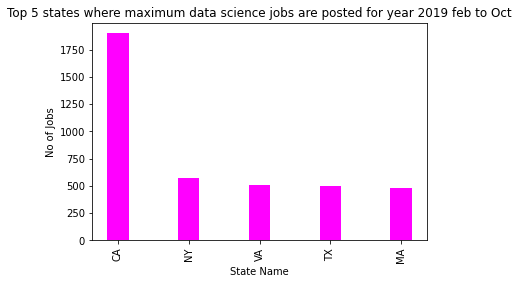

In [151]:
plt.bar(States,Counter, width = 0.3, color = 'magenta')                            #plotting a bar chart
plt.title(f'Top {counter_value} states where maximum data science jobs are posted for year 2019 feb to Oct')
plt.xticks(rotation = 90)
plt.xlabel('State Name')
plt.ylabel('No of Jobs')
plt.show()

https://insights.dice.com/2020/05/26/data-scientist-salary-starting-average-which-states-pay-most/ <br>
The information on this Site depicts the same information in 2020 , and have almost the same result

In [152]:
city_by_jobs = data.groupby(['city']).sum().reset_index()                        #creating a df

In [153]:
city_by_jobs.iloc[city_by_jobs.index[city_by_jobs['Counter'] == max(city_by_jobs['Counter'])].tolist()[0:4]]

,city,cursor,Counter
487,New York,1456175091203758592,933


In [154]:
counter_value = 5
Counter = sorted(city_by_jobs['Counter'], reverse = True)[0:counter_value]        #sorting to get Top Values
Cities = []
for i in range(0,len(Counter)):                                                # looping to get Cities with respect to Counter 
    Cities.append(city_by_jobs.loc[city_by_jobs['Counter'] == Counter[i] ,'city'].iloc[0])

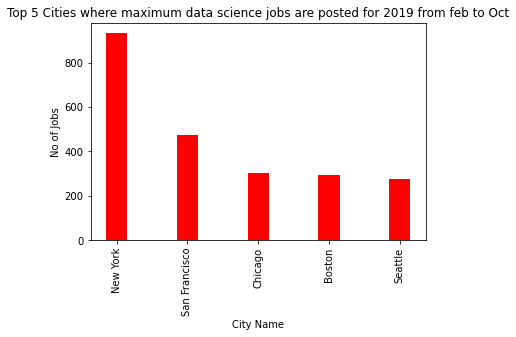

In [155]:
plt.bar(Cities,Counter, width = 0.3,color = 'red')                            #plotting a bar chart
plt.title(f'Top {counter_value} Cities where maximum data science jobs are posted for 2019 from feb to Oct' )
plt.xticks(rotation = 90)
plt.xlabel('City Name')
plt.ylabel('No of Jobs')
plt.show()

https://quanthub.com/is-there-a-data-scientist-shortage-in-2019/<br>
This above link resembles the analysis done for the above plot.

In [156]:
titles = data.groupby(['job_title']).sum().reset_index()

In [157]:
titles.iloc[titles.index[titles['Counter'] == max(titles['Counter'])].tolist()[0:4]] #maximum job_titles for Data Science jobs

,job_title,cursor,Counter
324,Data Scientist,4511192574777667072,2889


In [158]:
job_board = data.groupby(['job_board']).sum().reset_index()                   #creating a df

In [159]:
job_board.iloc[job_board.index[job_board['Counter'] == max(job_board['Counter'])].tolist()[0:4]]

,job_board,cursor,Counter
7,www.indeed.com,7739785899828563968,4955


In [160]:
counter_value = 5
Counter = sorted(job_board['Counter'], reverse = True)[0:counter_value]      #sorting to get Top Values
job_board_l = []
for i in range(0,len(Counter)):                                         # looping to get job_board with respect to Counter 
    job_board_l.append(job_board.loc[job_board['Counter'] == Counter[i] ,'job_board'].iloc[0])

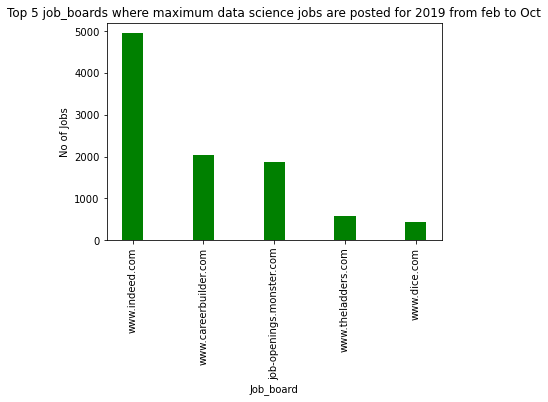

In [161]:
plt.bar(job_board_l,Counter, width = 0.3,color = 'green')                  #Plotting the graph
plt.title(f'Top {counter_value} job_boards where maximum data science jobs are posted for 2019 from feb to Oct' )
plt.xticks(rotation = 90)
plt.xlabel('Job_board')
plt.ylabel('No of Jobs')
plt.show()

In [162]:
job_type = data.groupby(['job_type']).sum().reset_index()        #creating a df

**Ordering by Counter in Descending order**

In [163]:
job_type.sort_values('Counter',ascending = False, inplace = True)

**Replaced Undefined with second most value in job_type**

In [164]:
job_type['job_type'].replace('Undefined',job_type['job_type'][1], inplace = True)

In [165]:
final_job_type = job_type.groupby(['job_type']).sum().reset_index()                # creating a df
final_job_type

,job_type,cursor,Counter
0,Contract,7.600742e+17,488.0
1,Full Time,1.484795e+19,9504.0
2,Internship,3.113482e+15,2.0
3,Part Time,9.392782e+15,6.0


# Feature Extraction

In [166]:
data['month'] = [data['crawl_timestamp'][i].month for i in range(0,len(data['crawl_timestamp']))]  #creating a new month column

In [167]:
Monthdata = data.groupby('month').sum().reset_index()      # creating a df Monthdata

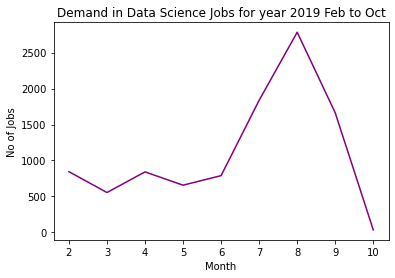

In [168]:
plt.plot(Monthdata['month'].tolist(),Monthdata['Counter'].tolist(),color = 'purple')  
plt.title('Demand in Data Science Jobs for year 2019 Feb to Oct') 
plt.xlabel('Month')
plt.ylabel('No of Jobs')
plt.show()

# Conclusion


URL is highly correlated to job_board that is with change in URL the job_board also changes, Computer or Internet is the category where most of the data sciecnce jobs were in 2019,and Top 5 Domains that have dataScience Jobs are Computer-or-internet, Computer Jobs ,PSS ,Engineering Architecture,Manufacturing ,and Mechanical. In USA, Maximum numbers of jobs in 2019 were in California state , and Top 5 States with maximum No of Data Scientist Jobs were in California, New York, virginia ,Texas, and Massachusetts.Whereas, when we talk about Cities , Maximum no of jobs in 2019 were in New York City, and after that Top 5 Cities with maximum no of jobs are New York,San Francisco, Chicago, Boston, and then Seattle. Most of the Data Science jobs are with Title Data Scientist, and most of the Jobs are posted on Indeed.com, With ranking for the portals are as such Indeed, careerbuilders,monster, the ladders, and dice. Most of the Positions types are Full Time. If we compare along the months in the Year 2019, Graph shows that there was a sudden increase in no of jobs in June, and started decreasing in august, so there are high Vacancy at this time of the year.

